<a href="https://colab.research.google.com/github/bala-codes/SENTIMENT-ANALYSIS-ON-AMAZON-PRODUCT-REVIEWS-USING-ML-AND-DL/blob/master/codes%20(ML)/Part-2%20Sentiment%20Analysis%20-%20Amazon%20Product%20Reviews%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
import pickle
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
dfpos1 = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/reviews_pos1.csv',encoding='utf8', usecols =  ["review_body", "star_rating", "star_rating_enc"])
dfpos2 = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/reviews_pos2.csv',encoding ='utf8', usecols =  ["review_body", "star_rating", "star_rating_enc"])

dfneg1 = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/reviews_neg1.csv',encoding='utf8',usecols =  ["review_body", "star_rating", "star_rating_enc"])
dfneg2 = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/reviews_neg2.csv',encoding ='utf8',usecols =  ["review_body", "star_rating", "star_rating_enc"])

dfpos1 = pd.DataFrame(dfpos1)
dfpos2 = pd.DataFrame(dfpos2)

dfneg1 = pd.DataFrame(dfneg1)
dfneg2 = pd.DataFrame(dfneg2)

In [ ]:
dftrain = pd.concat([dfpos1, dfneg1], axis = 0)
dftest = pd.concat([dfpos2, dfneg2], axis = 0)

dftrain = pd.DataFrame(dftrain)
dftest = pd.DataFrame(dftest)

In [ ]:
print(dftrain.shape)
dftrain.head()

(300000, 3)


,review_body,star_rating,star_rating_enc
0,GOOD VALUE,4.0,1.0
1,Excellent quality.,5.0,1.0
2,3rd season using it. I only fill with water an...,4.0,1.0
3,Nice bag. Should have another strap on bottom ...,4.0,1.0
4,Gave this to my son who used it while we were ...,5.0,1.0


In [ ]:
print(dftest.shape)
dftest.head()

(100000, 3)


,review_body,star_rating,star_rating_enc
0,Very well made and sturdy. The fabric is breat...,4.0,1.0
1,Loved the amount of compression these socks ha...,5.0,1.0
2,"really nice shirt, not too warm.",5.0,1.0
3,"I love these socks, comfortable, light, great ...",5.0,1.0
4,My 4 year old son has no issues opening it and...,5.0,1.0


In [ ]:
dftrain.drop_duplicates(inplace = True)
dftrain.dropna(inplace=True)

dftest.drop_duplicates(inplace = True)
dftest.dropna(inplace=True)

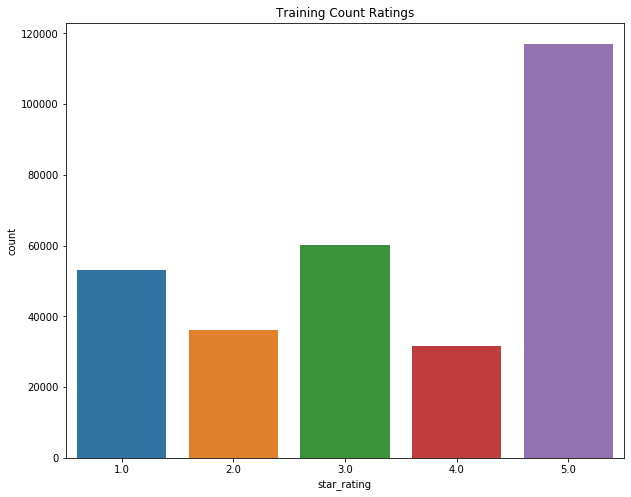

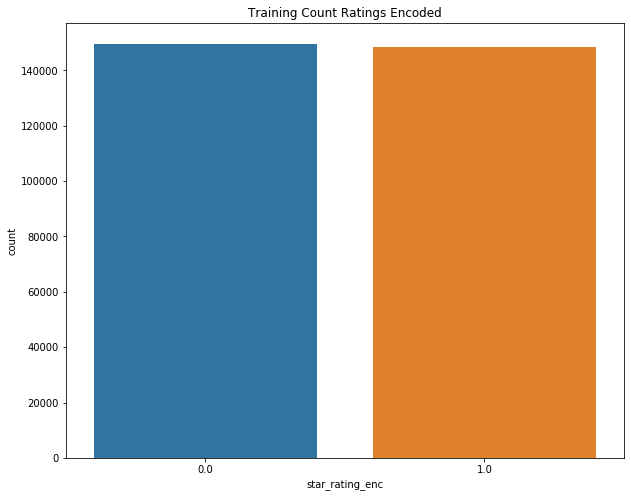

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Training Count Ratings')
sns.countplot(dftrain['star_rating'])
plt.show()

print('\n\n')
plt.figure(figsize=(10,8))
plt.title('Training Count Ratings Encoded')
sns.countplot(dftrain['star_rating_enc'])
plt.show()


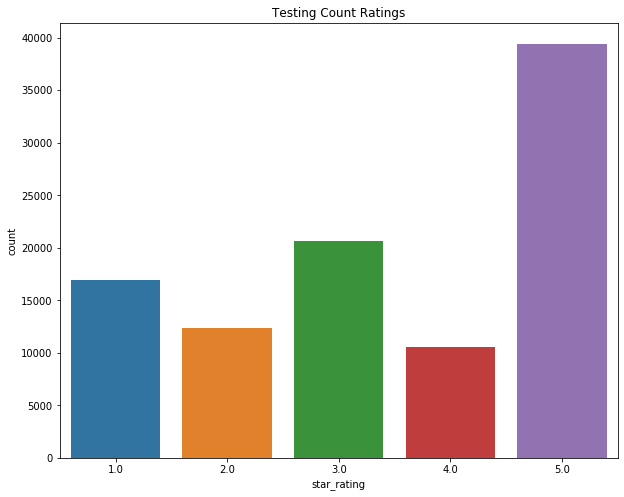

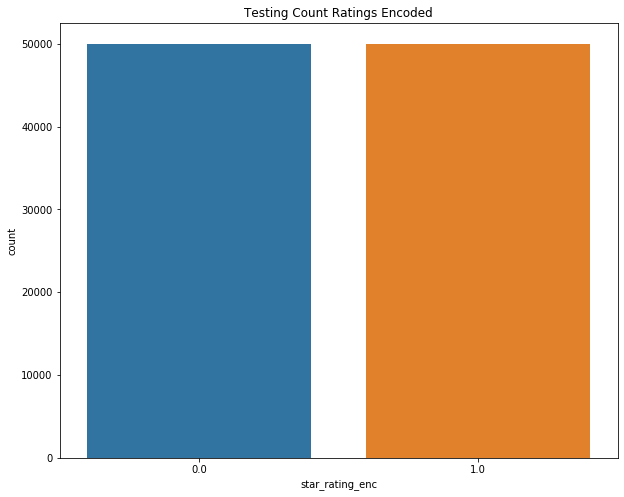

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Testing Count Ratings')
sns.countplot(dftest['star_rating'])
plt.show()

print('\n\n')
plt.figure(figsize=(10,8))
plt.title('Testing Count Ratings Encoded')
sns.countplot(dftest['star_rating_enc'])
plt.show()


In [ ]:
def word_count(sentence):
  return len(sentence.split())

dftrain['word count'] = dftrain['review_body'].apply(word_count)
dftrain.tail()

,review_body,star_rating,star_rating_enc,word count
149995,Good and loud,3.0,0.0,3
149996,"Bought this to use on MTB 29x2.1 tire, pumped ...",1.0,0.0,31
149997,"Everyone says this food is not that good, alth...",3.0,0.0,26
149998,"Unfortunately, the bracket interfered with bra...",1.0,0.0,58
149999,The pocket is kind of lame. It's on the side ...,3.0,0.0,25


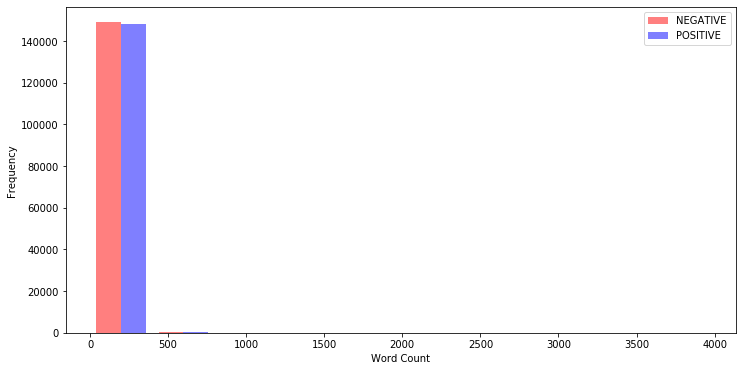

In [ ]:
import matplotlib.pyplot as plt
x = dftrain['word count'][dftrain.star_rating_enc == 0]
y = dftrain['word count'][dftrain.star_rating_enc == 1]

# Plotting the word count distribution for both FAKE and REAL news

plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['NEGATIVE','POSITIVE'])
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
print("No of Negative Review samples",dftrain[dftrain.star_rating_enc == 0].shape)
print("No of Positive Review samples",dftrain[dftrain.star_rating_enc == 1].shape)

No of Negative Review samples (149650, 4)
No of Positive Review samples (148622, 4)


#THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS , LEMMATIZATION PROCESS

In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])
    
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [ ]:
%%time

dftrain['review_body_cleaned'] = dftrain['review_body'].apply(text_cleaner)
dftest['review_body_cleaned'] = dftest['review_body'].apply(text_cleaner)

CPU times: user 31min 28s, sys: 3min 27s, total: 34min 56s
Wall time: 35min


In [ ]:
dftrain.to_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftraincleaned.csv", columns = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index= False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 
dftest.to_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftestcleaned.csv" , columns = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index=False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

# While coming next time , run the File here to save time.

In [ ]:
import pandas as pd

dftrain = pd.read_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftraincleaned.csv", usecols = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index_col = False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 
dftest = pd.read_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftestcleaned.csv" , usecols = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index_col = False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

dftrain = pd.DataFrame(dftrain)
dftest = pd.DataFrame(dftest)

dftrain.head()

,review_body,star_rating,star_rating_enc,review_body_cleaned
0,GOOD VALUE,4.0,1.0,GOOD VALUE
1,Excellent quality.,5.0,1.0,Excellent quality
2,3rd season using it. I only fill with water an...,4.0,1.0,3rd season use I fill water immediately drain ...
3,Nice bag. Should have another strap on bottom ...,4.0,1.0,Nice bag Should another strap bottom something...
4,Gave this to my son who used it while we were ...,5.0,1.0,Gave son use backpack He love


In [ ]:
dftrain['review_body_cleaned'] = dftrain['review_body_cleaned'].astype(str)
dftest['review_body_cleaned'] = dftest['review_body_cleaned'].astype(str)

# Displaying the most common words in the dataset
import collections
all_words = []

for line in list(dftrain['review_body_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('i', 338131),
 ('the', 83151),
 ('use', 74970),
 ('great', 62458),
 ('get', 60550),
 ('one', 54392),
 ('it', 49650),
 ('work', 47620),
 ('like', 47294),
 ('good', 44456)]

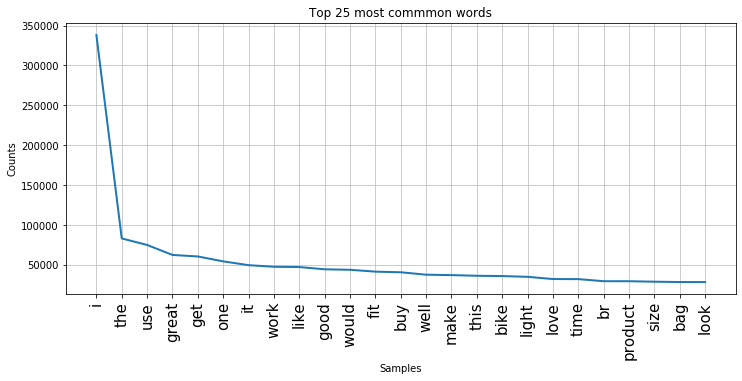

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


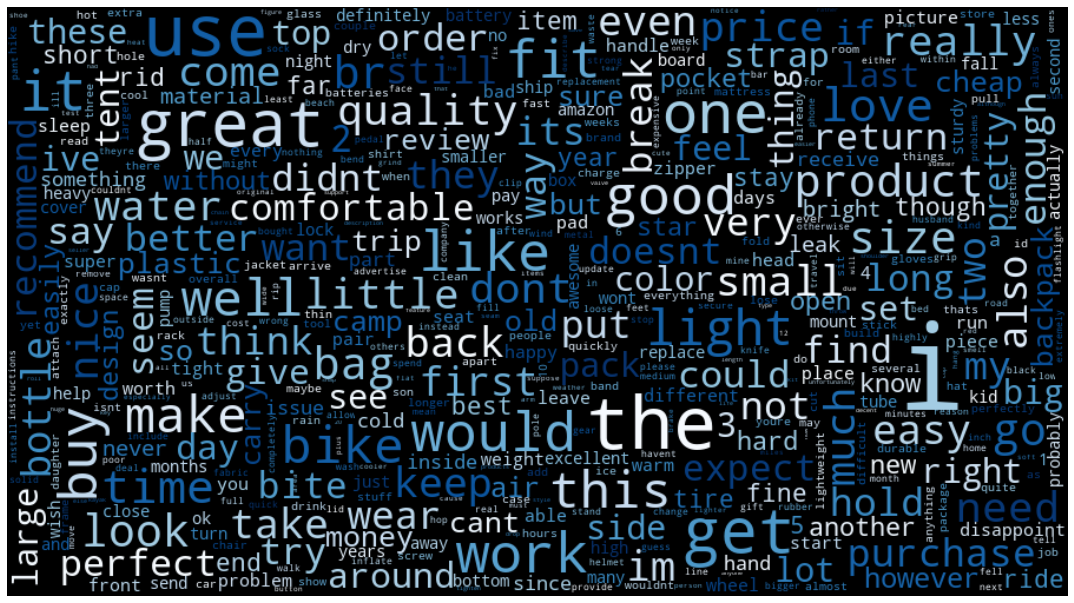

In [ ]:
!pip install WordCloud
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(dftrain['review_body_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X_train = dftrain['review_body_cleaned']
y_train = dftrain['star_rating_enc']

X_test = dftest['review_body_cleaned']
y_test = dftest['star_rating_enc']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(298272,) (298272,) (100000,) (100000,)


# TFIDF VECTORIZER

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df = 0.9)
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)

#this command gives importance measure for each and every word
print(tfidf_train[0:3])

  (0, 1950074)	0.5983550313646973
  (0, 776992)	0.7380279385849071
  (0, 772884)	0.3119070667821825
  (1, 1414221)	0.3746401464090581
  (1, 618596)	0.7693559537146153
  (1, 617801)	0.5174322923653628
  (2, 2079628)	0.0419142308047975
  (2, 2079579)	0.06345430413970207
  (2, 2079281)	0.057718561164814025
  (2, 2058085)	0.0593014172574782
  (2, 2057998)	0.01685721563430912
  (2, 2051828)	0.026794016827268445
  (2, 2047870)	0.016171366763609217
  (2, 2011890)	0.054297916947510454
  (2, 2009149)	0.017193009403791676
  (2, 1994208)	0.06935507008567628
  (2, 1994153)	0.05049417807042696
  (2, 1988151)	0.056725578146807024
  (2, 1987806)	0.06935507008567628
  (2, 1987161)	0.0593014172574782
  (2, 1986844)	0.05354016847072338
  (2, 1986025)	0.06935507008567628
  (2, 1985850)	0.10385603869454266
  (2, 1953762)	0.06345430413970207
  (2, 1953756)	0.05818616367314722
  :	:
  (2, 226333)	0.06477234445263304
  (2, 224881)	0.06443357302704635
  (2, 224288)	0.024751390315068705
  (2, 214531)	0.0578605

# In the next code , kindly check the alpha values for which you get more accuracy and provide that accuracy in the hyperparameter section of all following models


#NAIVE BAYE'S MODEL

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER ngram range = (1,2)  CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=1.0)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + Naive Bayes :", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = [0,1])
print(cm)



Score from TFIDF Vectorizer + Naive Bayes : 85.612 %
[[43769  6231]
 [ 8157 41843]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.77594

Alpha:  0.1
Score:  0.85065

Alpha:  0.2
Score:  0.85446

Alpha:  0.30000000000000004
Score:  0.85539

Alpha:  0.4
Score:  0.85604

Alpha:  0.5
Score:  0.8564

Alpha:  0.6000000000000001
Score:  0.85656

Alpha:  0.7000000000000001
Score:  0.85647

Alpha:  0.8
Score:  0.85654

Alpha:  0.9
Score:  0.85641



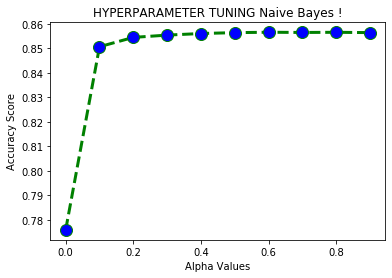

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Naive Bayes !') 
plt.show() 


In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)

# Bernoulli's Bayes

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.2)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 79.843 %
[[34889 15111]
 [ 5046 44954]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.74486

Alpha:  0.1
Score:  0.7988

Alpha:  0.2
Score:  0.79843

Alpha:  0.30000000000000004
Score:  0.798

Alpha:  0.4
Score:  0.79693

Alpha:  0.5
Score:  0.79622

Alpha:  0.6000000000000001
Score:  0.79512

Alpha:  0.7000000000000001
Score:  0.79413

Alpha:  0.8
Score:  0.79342

Alpha:  0.9
Score:  0.79268



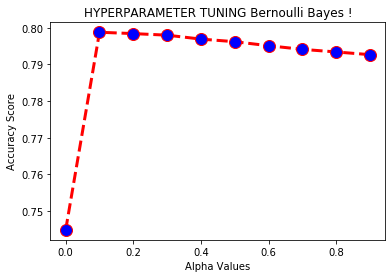

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Bernoulli Bayes !') 
plt.show() 

In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/bb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, bb_classifier), fout)

# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=150)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 83.977 %
[[41602  8398]
 [ 7625 42375]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.84088

Alpha:  100
Score:  0.84085

Alpha:  150
Score:  0.84068

Alpha:  200
Score:  0.839

Alpha:  250
Score:  0.84085

Alpha:  300
Score:  0.83978

Alpha:  350
Score:  0.84013

Alpha:  400
Score:  0.84004

Alpha:  450
Score:  0.84104

Alpha:  500
Score:  0.83968

Alpha:  600
Score:  0.83921

Alpha:  700
Score:  0.83925

Alpha:  800
Score:  0.83937

Alpha:  900
Score:  0.84089

Alpha:  1000
Score:  0.83989



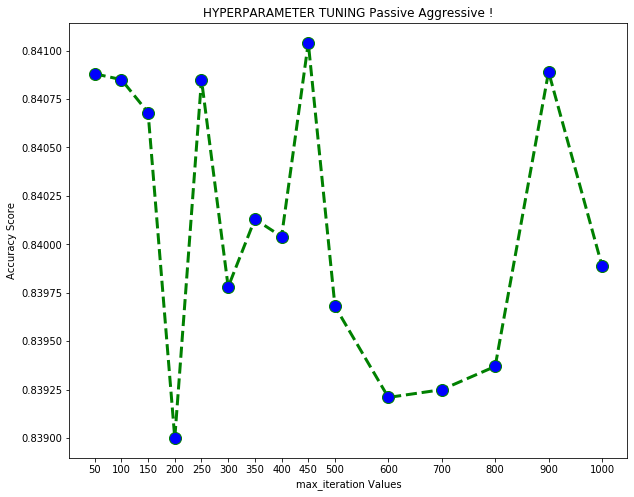

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.figure(figsize=(10,8))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('max_iteration Values') 
plt.ylabel('Accuracy Score')
plt.xticks((50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000))
plt.title('HYPERPARAMETER TUNING Passive Aggressive !') 
plt.show() 

In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/PA_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, PA_classifier), fout)

# Logistic Regression

In [ ]:
#USING LOGISTIC REGRESSION MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_classifier = LogisticRegression(C = 1)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score from TFIDF Vectorizer 86.444 %
[[43026  6974]
 [ 6582 43418]]


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100]
scores = []

# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.79296

C value:  0.01
Score:  0.81883

C value:  0.1
Score:  0.84575

C value:  1
Score:  0.86444

C value:  10
Score:  0.86465

C value:  100
Score:  0.85001



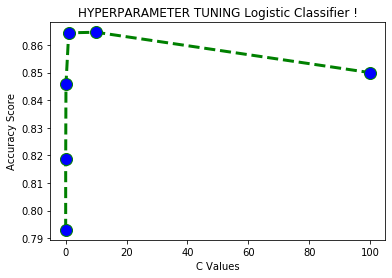

In [ ]:
import matplotlib.pyplot as plt 

x = C
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('C Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Logistic Classifier !') 
plt.show() 

In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)

# SGD CLASSIFIER

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifierr = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                            l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
                                          max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
                                                        power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                                                                      validation_fraction=0.1, verbose=0, warm_start=False)

SGD_classifierr.fit(tfidf_train,y_train)
pred = SGD_classifierr.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 85.831 %
[[43040  6960]
 [ 7209 42791]]


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

SGD_classifierr = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                            l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
                                          max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
                                                        power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                                                                      validation_fraction=0.1, verbose=0, warm_start=False)
clf = SGD_classifierr.fit(tfidf_train,y_train)
calibrator_classifier = CalibratedClassifierCV(clf, cv='prefit')
calibrator_classifier.fit(tfidf_train, y_train)


pred = calibrator_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer +  SGD_Calib", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer +  SGD_Calib 85.748 %
[[42559  7441]
 [ 6811 43189]]


In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SGD_calibrator_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, calibrator_classifier), fout)

In [1]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [5, 10, 20, 50, 100, 1000]
}

model = SGDClassifier()
SGD_classifier = GridSearchCV(model, param_grid=params)
SGD_classifier.fit(tfidf_train, y_train)

print(SGD_classifier.best_score_)
print(SGD_classifier.best_estimator_)  

'\n\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {\n    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],\n    \'alpha\': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],\n    "penalty" : ["l2", "l1", "none"],\n    "max_iter" : [5, 10, 20, 50, 100, 1000]\n}\n\nmodel = SGDClassifier()\nSGD_classifier = GridSearchCV(model, param_grid=params)\nSGD_classifier.fit(tfidf_train, y_train)\n\nprint(SGD_classifier.best_score_)\nprint(SGD_classifier.best_estimator_)  '

# SUPPORT VECTOR MACHINES

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 86.884 %
[[43075  6925]
 [ 6191 43809]]


In [ ]:
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_classifier), fout)

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "squared_hinge"],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
}

model = LinearSVC(class_weight = 'balanced')
svc = GridSearchCV(model, param_grid=params)
svc.fit(tfidf_train, y_train)

print("BEST SCORE FROM SVC", svc.best_score_)
print("BEST PARAMETERS FOR SVC",svc.best_estimator_)  


#ENSEMBLING

In [ ]:
import numpy as np

def ensemble(x):
  pred1 = bb_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = PA_classifier._predict_proba_lr(x)
  pred4 = logreg_classifier.predict_proba(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = SVC_classifier._predict_proba_lr(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred

In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)

Test_Pred_Prob [[0.17858604 0.82141396]
 [0.15912677 0.84087323]
 [0.1476404  0.8523596 ]
 ...
 [0.97299455 0.02700545]
 [0.94066105 0.05933895]
 [0.79332371 0.20667629]]


# Our Ensemble Score for Training and Testing


In [ ]:
print(type(y_test))
score = metrics.accuracy_score(y_test,pred)
print("Testing Accuracy Score from ENSEMBLE", round(score*100,3) ,"%")

<class 'pandas.core.series.Series'>
Testing Accuracy Score from ENSEMBLE 86.363 %


In [ ]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[42059  7941]
 [ 5696 44304]]


In [ ]:
# Randomized search CV codes
'''
from sklearn.model_selection import RandomizedSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [5, 10, 20, 50, 100, 1000]
}
# create and fit a ridge regression model, testing random alpha values
SGD_classifier = SGDClassifier()
rsearch = RandomizedSearchCV(estimator=SGD_classifier, param_distributions=params)
rsearch.fit(tfidf_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)'''

In [ ]:
pred = []
pred = ensemble(tfidf_train)
pred = np.array(pred)

score = metrics.accuracy_score(y_train,pred)
print("Training Accuracy Score from ENSEMBLE", round(score*100,3) ,"%")

Test_Pred_Prob [[0.10709938 0.89290062]
 [0.03778644 0.96221356]
 [0.21515054 0.78484946]
 ...
 [0.69040333 0.30959667]
 [0.84905951 0.15094049]
 [0.719586   0.280414  ]]
Training Accuracy Score from ENSEMBLE 95.838 %
